In [1]:
# data
# 3,5,6, 4_lat
adabits_result = [
    33.93, 7.35, 29.82, 14.73
]
llm_pq_result = [
    39.70, 9.97, 46.60, 24.40
]
x_labels = ['3', '5', '6', '4_lat']
fig_font_size = 18

In [3]:
import matplotlib.pyplot as plt

def plot_barplot(adabits_result, llm_pq_result, x_labels, fig_font_size):
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(6, 5.5))

    # Set the font size
    plt.rcParams['font.size'] = fig_font_size

    # Set the bar width
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    bar_positions = range(len(adabits_result))

    # Plot the bars
    adabits_bars = ax.bar(bar_positions, adabits_result, width=bar_width, label='Adabits',  color='silver',  hatch='x')
    llm_pq_bars = ax.bar([pos + bar_width for pos in bar_positions], llm_pq_result, width=bar_width, color='gray', label='llm_pq', hatch='/')

    # Set the x-axis tick labels
    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
    ax.set_xticklabels(x_labels)

    # Set the y-axis label
    ax.set_ylabel('Throughput(token/s)')
    ax.set_xlabel('Cluster', fontsize=fig_font_size)
    # Set the title
    # ax.set_title('Bar Plot')

    # Add a legend
    ax.legend(fontsize=fig_font_size)
    fig.savefig('adabits.pdf', dpi=300, format='pdf')

    # Display the plot
    plt.show()


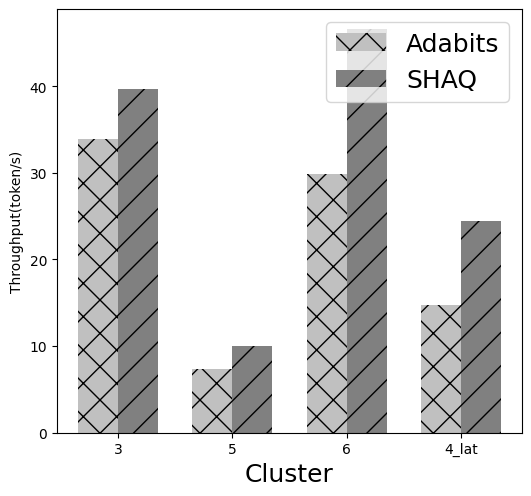

In [4]:
plot_barplot(adabits_result, llm_pq_result, x_labels, fig_font_size)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(data):
    # Extract x-axis labels from the data
    x_labels = list(data['cluster6'].keys())
    # Extract data for each bar and set labels
    cluster4_lat_pipedge = [data['cluster4-lat'][k][0] for k in x_labels]
    cluster4_lat_llm_pq = [data['cluster4-lat'][k][1] for k in x_labels]
    cluster6_pipedge = [data['cluster6'][k][0] for k in x_labels]
    cluster6_llm_pq = [data['cluster6'][k][1] for k in x_labels]

    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(8, 6))

    # Define the indices for each group of bars, and the width of each group
    bar_width = 0.2
    ind1 = np.arange(len(x_labels)) - bar_width * 1.5 - 0.02
    ind2 = np.arange(len(x_labels)) - bar_width * 0.5 - 0.02
    ind3 = np.arange(len(x_labels)) + bar_width * 0.5 + 0.01
    ind4 = np.arange(len(x_labels)) + bar_width * 1.5 + 0.01

    # Plot each group of bars with labels
    ax.bar(ind1, cluster4_lat_pipedge, width=bar_width, hatch='x', label='Cluster4-lat-PipeEdge', color='silver')
    ax.bar(ind2, cluster4_lat_llm_pq, width=bar_width,  hatch='/', label='Cluster4-lat-llm_pq', color='gray')
    ax.bar(ind3, cluster6_pipedge, width=bar_width,  hatch='x', label='Cluster6-PipeEdge', color='lightgray')
    ax.bar(ind4, cluster6_llm_pq, width=bar_width,  hatch='/', label='Cluster6-llm_pq', color='dimgray')

    # Set the x-axis ticks and labels
    ax.set_xticks(ind2 + bar_width / 2)
    ax.set_xticklabels([x.split(',')[0].split('(')[-1] for x in x_labels],fontsize=fig_font_size)
    ax.tick_params(axis='y', labelsize=14)
    # Set axis labels and title
    ax.set_xlabel('Gamma', fontsize=fig_font_size)
    ax.set_ylabel('Avg. Throughput (token/s)', fontsize=fig_font_size)
    # ax.set_title('Data Plot')

    # Show legend
    ax.legend(fontsize=fig_font_size)
    fig.savefig('varing_generation_length.pdf', dpi=300, format='pdf')
    # Show the plot
    plt.show()

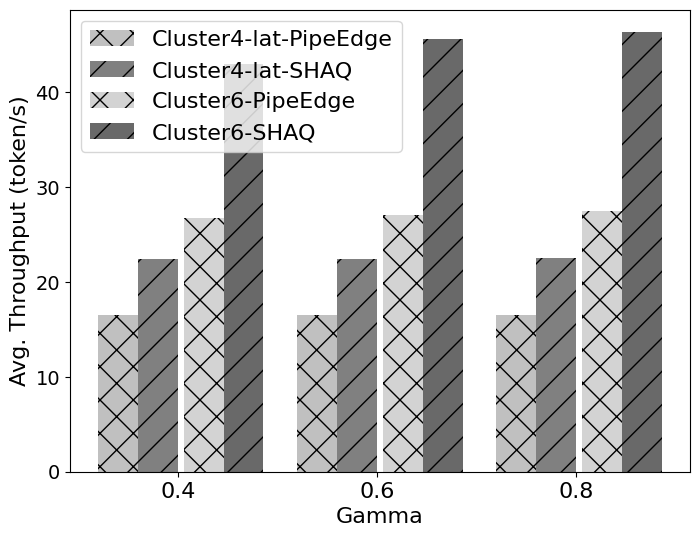

In [18]:
plot_data(data)